In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.contrib.learn as skflow
from sklearn.utils import shuffle
import numpy as np
import pandas as pd

df = pd.read_csv("data/boston.csv", header=0)
print df.describe()

             CRIM         ZN       INDUS         CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.1057

<IPython.core.display.Javascript object>


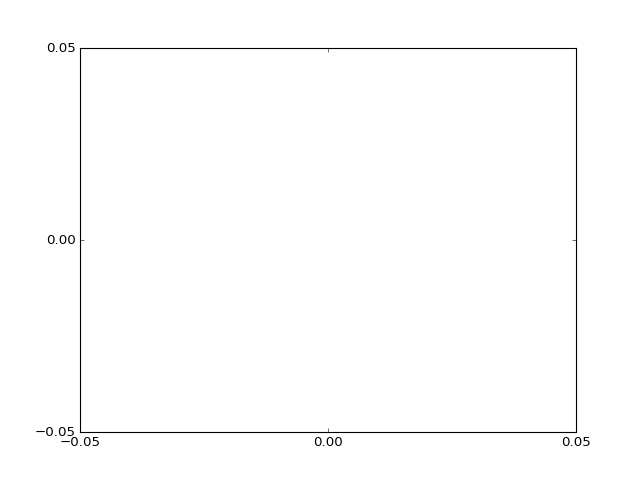

<IPython.core.display.Javascript object>


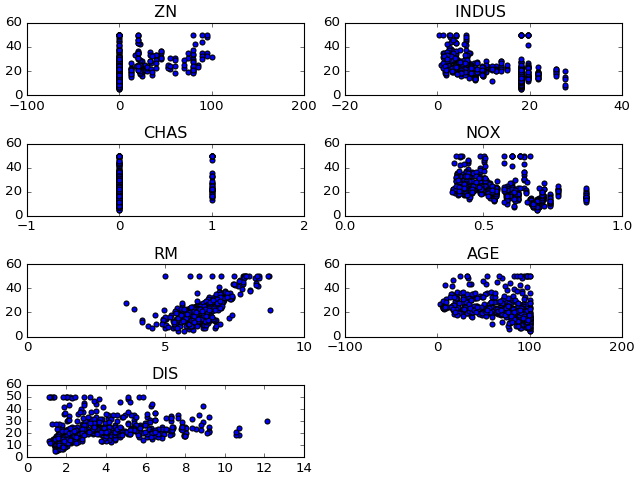

In [2]:
f, ax1 = plt.subplots()
plt.figure() # Create a new figure

y = df['MEDV']

for i in range (1,8):
    number = 420 + i
    ax1.locator_params(nbins=3)
    ax1 = plt.subplot(number)
    plt.title(list(df)[i])
    ax1.scatter(df[df.columns[i]],y) #Plot a scatter draw of the  datapoints
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


In [3]:
X = tf.placeholder("float", name="X") # create symbolic variables
Y = tf.placeholder("float", name = "Y")

In [4]:
with tf.name_scope("Model"):

    w = tf.Variable(tf.random_normal([2], stddev=0.01), name="b0") # create a shared variable
    b = tf.Variable(tf.random_normal([2], stddev=0.01), name="b1") # create a shared variable
    
    def model(X, w, b):
        return tf.mul(X, w) + b # We just define the line as X*w + b0  

    y_model = model(X, w, b)

In [5]:
with tf.name_scope("CostFunction"):
    cost = tf.reduce_mean(tf.pow(Y-y_model, 2)) # use sqr error for cost function

In [6]:
train_op = tf.train.AdamOptimizer(0.01).minimize(cost)

In [7]:
sess = tf.Session()
init = tf.initialize_all_variables()
tf.train.write_graph(sess.graph, '/home/bonnin/linear2','graph.pbtxt')
cost_op = tf.scalar_summary("loss", cost)
merged = tf.merge_all_summaries()
sess.run(init)
writer = tf.train.SummaryWriter('/home/bonnin/linear2', sess.graph)
xvalues = df[['INDUS ', 'AGE']].values.astype(float)
yvalues = df[df.columns[12]].values.astype(float)
b0temp=b.eval(session=sess)
b1temp=w.eval(session=sess)


In [8]:
for a in range (1,50):
    cost1=0.0
    for i, j in zip(xvalues, yvalues):   
        sess.run(train_op, feed_dict={X: i, Y: j}) 
        cost1+=sess.run(cost, feed_dict={X: i, Y: i})/506.00
        #writer.add_summary(summary_str, i) 
    xvalues, yvalues = shuffle (xvalues, yvalues)
    print (cost1)
    b0temp=b.eval(session=sess)
    b1temp=w.eval(session=sess)
    print (b0temp)
    print (b1temp)
#plt.plot (trX, b0temp + b1temp * trX )

1580.53295174
[ 2.25225258  1.30112672]
[ 0.80297691  0.22137061]
1512.3965525
[ 4.62365675  2.90244412]
[ 1.16225874  0.28009811]
1495.47174799
[ 6.52791834  4.29297304]
[ 0.82479227  0.17988272]
1512.38589876
[ 8.52646828  5.69351387]
[ 0.83486766  0.21489637]
1506.55531282
[ 10.31897259   7.00897598]
[ 0.58638084  0.13111909]
1521.15510733
[ 12.12552261   8.35123348]
[ 0.52983379  0.15963158]
1531.88494793
[ 13.8365202    9.60272503]
[ 0.44080809  0.15301962]
1535.34502895
[ 15.37972832  10.79114532]
[ 0.28358239  0.1142357 ]
1546.61507078
[ 16.87688446  11.97835445]
[ 0.16027129  0.10529317]
1548.75581579
[ 18.28533363  13.06896591]
[ 0.07885186  0.07610106]
1563.31528722
[ 19.59293747  14.14670753]
[-0.02251041  0.05306334]
1567.18108226
[ 20.76877213  15.17814922]
[-0.11247967  0.0357404 ]
1583.55182893
[ 21.92701149  16.22344398]
[-0.12607774  0.05911922]
1585.26675455
[ 22.95018578  17.15932465]
[-0.1723267   0.01478308]
1596.42586796
[ 23.78410912  18.10266113]
[-0.30183995  0